In [1]:
!gdown --id 1Iwq81QKeYybF37mppZb4qyquidSRXhhU
!gdown --id 1K06ypXqcoTqpk7ZgRQwRNx5H23P5lo6L
!gdown --id 1Jrs-JRsW-XiCRwF1bgUGEOKTolb2q8FF
!gdown --id 12LDCZeieZvZ4PlzETLwltA8RlW0Jn6nu
!gdown --id 1zkENgA6eHBsL2ULpKTN0Bub8fzIS2U6T
!gdown --id 1ZhPKl8zI3MTHjGlNBIqP5enZZtfDau9L
!gdown --id 1U3iTM7Fr3jCEIy9cT4CL1OsUi2noPENX
!gdown --id 1aWOAaC2DV3vvHtxOOghm3nYxY1C9lvS-

Downloading...
From: https://drive.google.com/uc?id=1Iwq81QKeYybF37mppZb4qyquidSRXhhU
To: /content/behavior.csv
100% 4.12k/4.12k [00:00<00:00, 3.58MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K06ypXqcoTqpk7ZgRQwRNx5H23P5lo6L
To: /content/blood_info.csv
100% 31.6k/31.6k [00:00<00:00, 995kB/s]
Downloading...
From: https://drive.google.com/uc?id=1Jrs-JRsW-XiCRwF1bgUGEOKTolb2q8FF
To: /content/disease_info.csv
100% 627/627 [00:00<00:00, 530kB/s]
Downloading...
From: https://drive.google.com/uc?id=12LDCZeieZvZ4PlzETLwltA8RlW0Jn6nu
To: /content/internal_health_info.csv
100% 26.3k/26.3k [00:00<00:00, 1.67MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zkENgA6eHBsL2ULpKTN0Bub8fzIS2U6T
To: /content/medicine_info.csv
100% 1.00k/1.00k [00:00<00:00, 793kB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZhPKl8zI3MTHjGlNBIqP5enZZtfDau9L
To: /content/person.csv
100% 20.6k/20.6k [00:00<00:00, 1.31MB/s]
Downloading...
From: https://drive.google.com/uc?id=1U3iTM7Fr3jCEIy9

In [2]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import plotly.express as px

In [3]:
behavior = pd.read_csv('behavior.csv')
behavior.head()

,SubjectID,Appetite Questionnaire results,Preference Questionnaire results,Sleep Questionnaire results,Anxiety about health Questionnaire results,I can go up and down stairs without being transmitted to the railing or wall,I can walk for more than 15 minutes,I am actively going out,Do the cleaning and washing yourself,Shop for daily necessities yourself,No weight loss of more than 2-3 kg in the last 6 months,No weight gain of more than 2-3 kg in the last 2 months,Exercise function,Nutrition
0,cefoxSR1707004101,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,yes,yes,good,good
1,cefoxSR1707003701,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,yes,yes,Observation required,Observation required
2,cefoxSR1707005101,some,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,yes,yes,Observation required,Observation required
3,cefoxSR1707003501,a lot,I like sweets,Sleeping,a lot,yes,yes,yes,no,yes,yes,yes,Observation required,good
4,cefoxSR1601000701,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,yes,yes,good,Observation required


In [4]:
blood_info = pd.read_csv('blood_info.csv')
blood_info.head()

,SubjectID,Measure Date Time,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,Pulse Rate,Irregular Pulse Flag,Pulse Rate Range Detection Flag,Blood sugar
0,cefoxSR1601000701,2021-01-21T13:37:25,140,84,113,70,false,0,88.0
1,cefoxSR1601000701,2021-01-21T13:38:51,139,81,112,65,false,0,88.0
2,cefoxSR1601000701,2021-01-22T08:28:33,120,74,94,73,false,0,88.0
3,cefoxSR1601000701,2021-01-22T08:29:39,120,70,92,73,false,0,88.0
4,cefoxSR1601000701,2021-01-23T07:57:23,122,71,96,63,false,0,88.0


In [40]:
disease_info = pd.read_csv('disease_info.csv')
disease_info.head()

,SubjectID,Arrhythmia,Diabetes mellitus
0,cefoxSR1707004101,Nothing,Nothing
1,cefoxSR1707003701,Nothing,Yes
2,cefoxSR1707005101,Nothing,Nothing
3,cefoxSR1707003501,Nothing,Nothing
4,cefoxSR1601000701,Nothing,Nothing


In [41]:
internal_health_info = pd.read_csv('internal_health_info.csv')
internal_health_info.head()

,SubjectID,Measure Date Time,Body Fat Percentage,Basal Metabolism,Inspection date,Total cholesterol,LDL cholesterol,HDL cholesterol,HbA1c,AST,ALT,LDH,Na,K,ECG abnormalities,History of coronary artery disease
0,cefoxSR1601000701,2021-01-21T13:24:44,39.8,1381.9312,2020/8/31,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,NaN,NaN
1,cefoxSR1601000701,2021-01-21T20:58:12,35.7,1382.8872,2020/8/31,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,NaN,NaN
2,cefoxSR1601000701,2021-01-22T08:30:19,39.4,1371.8930,2020/8/31,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,NaN,NaN
3,cefoxSR1601000701,2021-01-23T08:00:48,41.4,1363.7667,2020/8/31,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,NaN,NaN
4,cefoxSR1601000701,2021-01-24T08:34:44,39.8,1370.9369,2020/8/31,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,NaN,NaN


In [42]:
medicine_info = pd.read_csv('medicine_info.csv')
medicine_info.head()

,SubjectID,Antihypertensive,Antidepressant,Osteoporosis drug,Antidiabetic drug
0,cefoxSR1707004101,Amlodipine,NaN,NaN,NaN
1,cefoxSR1707003701,NaN,NaN,Alendronic acid,"Tenelia,Metoformin hydrochloride,Repaglinide,"
2,cefoxSR1707005101,Amlodipine,NaN,NaN,NaN
3,cefoxSR1707003501,"Olmesartan, Nifedipine",NaN,NaN,NaN
4,cefoxSR1601000701,NaN,NaN,NaN,NaN


In [43]:
person = pd.read_csv('person.csv')
person.head()

,SubjectID,Measure Date Time,BMI,Body Age,Age,Gender,Height,Body weight,Smoking,Drinking
0,cefoxSR1601000701,2021-01-21T13:24:44,28.8,80,77.0,Female,156.0,60.0,no,yes
1,cefoxSR1601000701,2021-01-21T20:58:12,28.4,80,77.0,Female,156.0,60.0,no,yes
2,cefoxSR1601000701,2021-01-22T08:30:19,28.5,80,77.0,Female,156.0,60.0,no,yes
3,cefoxSR1601000701,2021-01-23T08:00:48,28.5,80,77.0,Female,156.0,60.0,no,yes
4,cefoxSR1601000701,2021-01-24T08:34:44,28.5,80,77.0,Female,156.0,60.0,no,yes


In [44]:
sleep_info = pd.read_csv('sleep_info.csv')
sleep_info.head()

,SubjectID,Measure Date Time,Sleep Hour,Sleep Minute,Sleep Questionnaire results
0,cefoxSR1601000701,2021-01-20T23:30:32,0,0,Sleeping
1,cefoxSR1601000701,2021-01-20T23:31:36,0,0,Sleeping
2,cefoxSR1601000701,2021-01-20T23:32:36,0,0,Sleeping
3,cefoxSR1601000701,2021-01-20T23:33:36,0,0,Sleeping
4,cefoxSR1601000701,2021-01-20T23:34:36,0,0,Sleeping


In [45]:
time_info = pd.read_csv('time_info.csv')
time_info.head()

,Measure Date Time,year,month,day,week,weekday,hour,minute,second
0,2021-01-20T23:30:32,2021,1,20,3,2,23,30,32
1,2021-01-20T23:31:36,2021,1,20,3,2,23,31,36
2,2021-01-20T23:32:36,2021,1,20,3,2,23,32,36
3,2021-01-20T23:33:36,2021,1,20,3,2,23,33,36
4,2021-01-20T23:34:36,2021,1,20,3,2,23,34,36


In [46]:
star_1 = pd.merge(person, time_info, on=' Measure Date Time', how='left')
sleep_info_time = pd.merge(sleep_info, time_info, on=' Measure Date Time', how='left')[[
                          'SubjectID',' Sleep Hour', ' Sleep Minute',
                          'year', 'month', 'day', 'hour']]
sleep_info_time = sleep_info_time.drop_duplicates(['SubjectID', 'year', 'month', 'day', 'hour']).reset_index(drop=True)
star_2 = pd.merge(star_1, sleep_info_time, on=['SubjectID', 'year',	'month', 'day', 'hour'],  how='left')
star_3 = pd.merge(star_2, medicine_info, on=['SubjectID'],  how='left')
internal_health_info_time = pd.merge(internal_health_info, time_info, on=' Measure Date Time', how='left')[[
                          'SubjectID',' Body Fat Percentage', ' Basal Metabolism',
                          'Inspection date', 'Total cholesterol', 'LDL cholesterol',
                          'HDL cholesterol', 'HbA1c',	'AST', 'ALT',	'LDH', 'Na', 'K',
                          'year', 'month', 'day', 'hour']]
internal_health_info_time = internal_health_info_time.drop_duplicates(['SubjectID', 'year', 'month', 'day', 'hour']).reset_index(drop=True)
star_4 = pd.merge(star_3, internal_health_info_time, on=['SubjectID', 'year',	'month', 'day', 'hour'],  how='left')
star_5 = pd.merge(star_4, disease_info, on=['SubjectID'],  how='left') 
blood_info_time = pd.merge(blood_info, time_info, on=' Measure Date Time', how='left')[[
                          'SubjectID',' Systolic Pressure', ' Diastolic Pressure',
                          ' Mean Arterial Pressure', ' Pulse Rate', ' Irregular Pulse Flag',
                          ' Pulse Rate Range Detection Flag', 'Blood sugar',
                          'year', 'month', 'day', 'hour']]
blood_info_time = blood_info_time.drop_duplicates(['SubjectID', 'year', 'month', 'day', 'hour']).reset_index(drop=True)
star_6 = pd.merge(star_5, blood_info_time, on=['SubjectID', 'year',	'month', 'day', 'hour'],  how='left')
star_data = pd.merge(star_6, behavior, on=['SubjectID'],  how='left') 
star_data

,SubjectID,Measure Date Time,BMI,Body Age,Age,Gender,Height,Body weight,Smoking,Drinking,year,month,day,week,weekday,hour,minute,second,Sleep Hour,Sleep Minute,Antihypertensive,Antidepressant,Osteoporosis drug,Antidiabetic drug,Body Fat Percentage,Basal Metabolism,Inspection date,Total cholesterol,LDL cholesterol,HDL cholesterol,HbA1c,AST,ALT,LDH,Na,K,Arrhythmia,Diabetes mellitus,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,Pulse Rate,Irregular Pulse Flag,Pulse Rate Range Detection Flag,Blood sugar,Appetite Questionnaire results,Preference Questionnaire results,Sleep Questionnaire results,Anxiety about health Questionnaire results,I can go up and down stairs without being transmitted to the railing or wall,I can walk for more than 15 minutes,I am actively going out,Do the cleaning and washing yourself,Shop for daily necessities yourself,No weight loss of more than 2-3 kg in the last 6 months,No weight gain of more than 2-3 kg in the last 2 months,Exercise function,Nutrition
0,cefoxSR1601000701,2021-01-21T13:24:44,28.8,80,77.0,Female,156.0,60.0,no,yes,2021,1,21,3,3,13,24,44,0.0,0.0,NaN,NaN,NaN,NaN,39.8,1381.9312,2020/8/31,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,Nothing,Nothing,140.0,84.0,113.0,70.0,false,0.0,88.0,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,yes,yes,good,Observation required
1,cefoxSR1601000701,2021-01-21T20:58:12,28.4,80,77.0,Female,156.0,60.0,no,yes,2021,1,21,3,3,20,58,12,0.0,0.0,NaN,NaN,NaN,NaN,35.7,1382.8872,2020/8/31,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,Nothing,Nothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,yes,yes,good,Observation required
2,cefoxSR1601000701,2021-01-22T08:30:19,28.5,80,77.0,Female,156.0,60.0,no,yes,2021,1,22,3,4,8,30,19,0.0,0.0,NaN,NaN,NaN,NaN,39.4,1371.8930,2020/8/31,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,Nothing,Nothing,120.0,74.0,94.0,73.0,false,0.0,88.0,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,yes,yes,good,Observation required
3,cefoxSR1601000701,2021-01-23T08:00:48,28.5,80,77.0,Female,156.0,60.0,no,yes,2021,1,23,3,5,8,0,48,0.0,0.0,NaN,NaN,NaN,NaN,41.4,1363.7667,2020/8/31,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,Nothing,Nothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,yes,yes,good,Observation required
4,cefoxSR1601000701,2021-01-24T08:34:44,28.5,80,77.0,Female,156.0,60.0,no,yes,2021,1,24,3,6,8,34,44,0.0,25.0,NaN,NaN,NaN,NaN,39.8,1370.9369,2020/8/31,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,Nothing,Nothing,128.0,80.0,104.0,70.0,false,0.0,88.0,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,yes,yes,good,Observation required
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,cefoxSR1707005601,2021-02-09T08:02:45,25.4,73,71.0,Female,161.0,64.0,no,no,2021,2,9,6,1,8,2,45,0.0,0.0,NaN,NaN,NaN,NaN,38.9,1324.8088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nothing,Nothing,128.0,67.0,102.0,65.0,false,0.0,NaN,some,I like light taste,Sleeping,a lot,yes,no,no,yes,yes,yes,yes,Observation required,good
271,cefoxSR1707005601,2021-02-10T07:41:08,25.4,74,71.0,Female,161.0,64.0,no,no,2021,2,10,6,2,7,41,8,0.0,23.0,NaN,NaN,NaN,NaN,39.1,1325.7648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nothing,Nothing,132.0,70.0,107.0,69.0,false,0.0,NaN,some,I like light taste,Sleeping,a lot,yes,no,no,yes,yes,yes,yes,Observation required,good
272,cefoxSR1707005601,2021-02-11T15:31:01,26.2,73,71.0,Female,161.0,64.0,no,no,2021,2,11,6,3,15,31,1,0.0,0.0,NaN,NaN,NaN,NaN,34.8,1371.8930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nothing,Nothing,168.0,104.0,132.0,77.0,false,0.0,NaN,some,I like light taste,Sleeping,a lot,yes,no,no,yes,yes,yes,yes,Observation required,good
273,cefoxSR1707005601,2021-02-13T08:00:07,25.5,74,71.0,Female,161.0,64.0,no,no,2021,2,13,6,5,8

In [47]:
no_use_columns = ['Arrhythmia', 'Antidepressant', 'Smoking', 'Inspection date', ' Pulse Rate Range Detection Flag', 
                  'No weight loss of more than 2-3 kg in the last 6 months', 'No weight gain of more than 2-3 kg in the last 2 months',
                  ' Sleep Minute', 'year', 'month', 'day', 'week', 'weekday', 'hour', 'minute', 'second']
star_data = star_data.drop(columns=no_use_columns)
star_data

,SubjectID,Measure Date Time,BMI,Body Age,Age,Gender,Height,Body weight,Drinking,Sleep Hour,Antihypertensive,Osteoporosis drug,Antidiabetic drug,Body Fat Percentage,Basal Metabolism,Total cholesterol,LDL cholesterol,HDL cholesterol,HbA1c,AST,ALT,LDH,Na,K,Diabetes mellitus,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,Pulse Rate,Irregular Pulse Flag,Blood sugar,Appetite Questionnaire results,Preference Questionnaire results,Sleep Questionnaire results,Anxiety about health Questionnaire results,I can go up and down stairs without being transmitted to the railing or wall,I can walk for more than 15 minutes,I am actively going out,Do the cleaning and washing yourself,Shop for daily necessities yourself,Exercise function,Nutrition
0,cefoxSR1601000701,2021-01-21T13:24:44,28.8,80,77.0,Female,156.0,60.0,yes,0.0,NaN,NaN,NaN,39.8,1381.9312,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,Nothing,140.0,84.0,113.0,70.0,false,88.0,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,good,Observation required
1,cefoxSR1601000701,2021-01-21T20:58:12,28.4,80,77.0,Female,156.0,60.0,yes,0.0,NaN,NaN,NaN,35.7,1382.8872,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,Nothing,NaN,NaN,NaN,NaN,NaN,NaN,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,good,Observation required
2,cefoxSR1601000701,2021-01-22T08:30:19,28.5,80,77.0,Female,156.0,60.0,yes,0.0,NaN,NaN,NaN,39.4,1371.8930,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,Nothing,120.0,74.0,94.0,73.0,false,88.0,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,good,Observation required
3,cefoxSR1601000701,2021-01-23T08:00:48,28.5,80,77.0,Female,156.0,60.0,yes,0.0,NaN,NaN,NaN,41.4,1363.7667,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,Nothing,NaN,NaN,NaN,NaN,NaN,NaN,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,good,Observation required
4,cefoxSR1601000701,2021-01-24T08:34:44,28.5,80,77.0,Female,156.0,60.0,yes,0.0,NaN,NaN,NaN,39.8,1370.9369,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.50,Nothing,128.0,80.0,104.0,70.0,false,88.0,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,good,Observation required
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,cefoxSR1707005601,2021-02-09T08:02:45,25.4,73,71.0,Female,161.0,64.0,no,0.0,NaN,NaN,NaN,38.9,1324.8088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nothing,128.0,67.0,102.0,65.0,false,NaN,some,I like light taste,Sleeping,a lot,yes,no,no,yes,yes,Observation required,good
271,cefoxSR1707005601,2021-02-10T07:41:08,25.4,74,71.0,Female,161.0,64.0,no,0.0,NaN,NaN,NaN,39.1,1325.7648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nothing,132.0,70.0,107.0,69.0,false,NaN,some,I like light taste,Sleeping,a lot,yes,no,no,yes,yes,Observation required,good
272,cefoxSR1707005601,2021-02-11T15:31:01,26.2,73,71.0,Female,161.0,64.0,no,0.0,NaN,NaN,NaN,34.8,1371.8930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nothing,168.0,104.0,132.0,77.0,false,NaN,some,I like light taste,Sleeping,a lot,yes,no,no,yes,yes,Observation required,good
273,cefoxSR1707005601,2021-02-13T08:00:07,25.5,74,71.0,Female,161.0,64.0,no,0.0,NaN,NaN,NaN,39.0,1327.9159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nothing,NaN,NaN,NaN,NaN,NaN,NaN,some,I like light taste,Sleeping,a lot,yes,no,no,yes,yes,Observation required,good


In [48]:
star_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 274
Data columns (total 42 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   SubjectID                                                                     275 non-null    object 
 1    Measure Date Time                                                            275 non-null    object 
 2    BMI                                                                          275 non-null    float64
 3    Body Age                                                                     275 non-null    int64  
 4   Age                                                                           255 non-null    float64
 5   Gender                                                                        255 non-null    object 
 6   Height                            

In [49]:
def cholesterol(x):
  if x == '\xad':
    return np.nan
  if not isinstance(x, float):
    return float(x.strip())
  return x
  
def checkNotNan(x):
  if isinstance(x, float):
    return not math.isnan(x)
  return True

In [50]:
star_data['Age'] = star_data['Age'].fillna(star_data['Age'].mean())
star_data['Gender'] = star_data['Gender'].fillna(star_data['Gender'][star_data['Gender'].apply(checkNotNan)].mode().values[0])   
star_data['Height'] = star_data['Height'].fillna(star_data['Height'].mean())                    
star_data['Body weight'] = star_data['Body weight'].fillna(star_data['Body weight'].mean())
star_data['Drinking'] = star_data['Drinking'].fillna(star_data['Drinking'][star_data['Drinking'].apply(checkNotNan)].mode().values[0])      
star_data[' Sleep Hour'] = star_data[' Sleep Hour'].fillna(star_data[' Sleep Hour'].median())    
star_data['Antihypertensive'] = star_data['Antihypertensive'].fillna('None') 
star_data['Antidiabetic drug'] = star_data['Antidiabetic drug'].fillna('None')              
star_data['Osteoporosis drug'] = star_data['Osteoporosis drug'].fillna('None')     
star_data['Total cholesterol'] = star_data['Total cholesterol'].apply(cholesterol)             
star_data['Total cholesterol'] = star_data['Total cholesterol'].fillna(star_data['Total cholesterol'].mean())
star_data['LDL cholesterol'] = star_data['LDL cholesterol'].apply(cholesterol)             
star_data['LDL cholesterol'] = star_data['LDL cholesterol'].fillna(star_data['LDL cholesterol'].mean())
star_data['HDL cholesterol'] = star_data['HDL cholesterol'].apply(cholesterol)             
star_data['HDL cholesterol'] = star_data['HDL cholesterol'].fillna(star_data['HDL cholesterol'].mean())               
star_data['HbA1c'] = star_data['HbA1c'].apply(cholesterol)             
star_data['HbA1c'] = star_data['HbA1c'].fillna(star_data['HbA1c'].mean())
star_data['AST'] = star_data['AST'].apply(cholesterol)             
star_data['AST'] = star_data['AST'].fillna(star_data['AST'].mean())      
star_data['ALT'] = star_data['ALT'].apply(cholesterol)             
star_data['ALT'] = star_data['ALT'].fillna(star_data['ALT'].mean())
star_data['LDH'] = star_data['LDH'].apply(cholesterol)             
star_data['LDH'] = star_data['LDH'].fillna(star_data['LDH'].mean())     
star_data['Na'] = star_data['Na'].apply(cholesterol)             
star_data['Na'] = star_data['Na'].fillna(star_data['Na'].mean())     
star_data['K'] = star_data['K'].apply(cholesterol)             
star_data['K'] = star_data['K'].fillna(star_data['K'].mean())
star_data['Diabetes mellitus'] = star_data['Diabetes mellitus'].fillna(star_data['Diabetes mellitus'][star_data['Diabetes mellitus'].apply(checkNotNan)].mode().values[0]) 
star_data[' Systolic Pressure'] = star_data[' Systolic Pressure'].fillna(star_data[' Systolic Pressure'].mean()) 
star_data[' Diastolic Pressure'] = star_data[' Diastolic Pressure'].fillna(star_data[' Diastolic Pressure'].mean())   
star_data[' Mean Arterial Pressure'] = star_data[' Mean Arterial Pressure'].fillna(star_data[' Mean Arterial Pressure'].mean())              
star_data[' Pulse Rate'] = star_data[' Pulse Rate'].fillna(star_data[' Pulse Rate'].mean())              
star_data[' Irregular Pulse Flag'] = star_data[' Irregular Pulse Flag'].fillna(star_data[' Irregular Pulse Flag'][star_data[' Irregular Pulse Flag'].apply(checkNotNan)].mode().values[0])                
star_data['Blood sugar'] = star_data['Blood sugar'].fillna(star_data['Blood sugar'].mean())    
star_data['Appetite Questionnaire results'] = star_data['Appetite Questionnaire results'].fillna('None')                        
star_data['Preference Questionnaire results'] = star_data['Preference Questionnaire results'].fillna('None') 
star_data['Sleep Questionnaire results'] = star_data['Sleep Questionnaire results'].fillna('None')     
star_data['Anxiety about health Questionnaire results'] = star_data['Anxiety about health Questionnaire results'].fillna('None')
star_data['I can go up and down stairs without being transmitted to the railing or wall'] = star_data['I can go up and down stairs without being transmitted to the railing or wall'].fillna('None') 
star_data['I can walk for more than 15 minutes'] = star_data['I can walk for more than 15 minutes'].fillna('no')    
star_data['I am actively going out'] = star_data['I am actively going out'].fillna('no') 
star_data['Do the cleaning and washing yourself'] = star_data['Do the cleaning and washing yourself'].fillna('no')    
star_data['Shop for daily necessities yourself'] = star_data['Shop for daily necessities yourself'].fillna('no')   
star_data['Exercise function'] = star_data['Exercise function'].fillna('None') 
star_data['Nutrition'] = star_data['Nutrition'].fillna('None') 

In [51]:
star_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 274
Data columns (total 42 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   SubjectID                                                                     275 non-null    object 
 1    Measure Date Time                                                            275 non-null    object 
 2    BMI                                                                          275 non-null    float64
 3    Body Age                                                                     275 non-null    int64  
 4   Age                                                                           275 non-null    float64
 5   Gender                                                                        275 non-null    object 
 6   Height                            

In [52]:
star_data.head()

,SubjectID,Measure Date Time,BMI,Body Age,Age,Gender,Height,Body weight,Drinking,Sleep Hour,Antihypertensive,Osteoporosis drug,Antidiabetic drug,Body Fat Percentage,Basal Metabolism,Total cholesterol,LDL cholesterol,HDL cholesterol,HbA1c,AST,ALT,LDH,Na,K,Diabetes mellitus,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,Pulse Rate,Irregular Pulse Flag,Blood sugar,Appetite Questionnaire results,Preference Questionnaire results,Sleep Questionnaire results,Anxiety about health Questionnaire results,I can go up and down stairs without being transmitted to the railing or wall,I can walk for more than 15 minutes,I am actively going out,Do the cleaning and washing yourself,Shop for daily necessities yourself,Exercise function,Nutrition
0,cefoxSR1601000701,2021-01-21T13:24:44,28.8,80,77.0,Female,156.0,60.0,yes,0.0,None,None,None,39.8,1381.9312,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.5,Nothing,140.000000,84.000000,113.000000,70.000000,false,88.000000,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,good,Observation required
1,cefoxSR1601000701,2021-01-21T20:58:12,28.4,80,77.0,Female,156.0,60.0,yes,0.0,None,None,None,35.7,1382.8872,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.5,Nothing,258.597403,197.292208,231.084416,184.175325,false,97.232143,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,good,Observation required
2,cefoxSR1601000701,2021-01-22T08:30:19,28.5,80,77.0,Female,156.0,60.0,yes,0.0,None,None,None,39.4,1371.8930,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.5,Nothing,120.000000,74.000000,94.000000,73.000000,false,88.000000,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,good,Observation required
3,cefoxSR1601000701,2021-01-23T08:00:48,28.5,80,77.0,Female,156.0,60.0,yes,0.0,None,None,None,41.4,1363.7667,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.5,Nothing,258.597403,197.292208,231.084416,184.175325,false,97.232143,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,good,Observation required
4,cefoxSR1601000701,2021-01-24T08:34:44,28.5,80,77.0,Female,156.0,60.0,yes,0.0,None,None,None,39.8,1370.9369,212.0,123.0,73.0,5.5,22.0,30.0,159.0,143.0,4.5,Nothing,128.000000,80.000000,104.000000,70.000000,false,88.000000,a lot,I like light taste,Sleeping,some,yes,yes,yes,yes,yes,good,Observation required


In [53]:
star_data[['SubjectID', ' Measure Date Time']].groupby('SubjectID').count()

,Measure Date Time
SubjectID,
cefoxSR1601000701,26
cefoxSR1707003501,25
cefoxSR1707003701,35
cefoxSR1707004101,8
cefoxSR1707004201,23
cefoxSR1707004301,5
cefoxSR1707004401,17
cefoxSR1707004501,15
cefoxSR1707004601,16


# Dummies

In [54]:
star_data_dummied = pd.concat([star_data, pd.get_dummies(star_data['Gender'], prefix='Gender')], axis=1)
star_data_dummied = star_data_dummied.drop(['Gender'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['Drinking'], prefix='Drinking')], axis=1)
star_data_dummied = star_data_dummied.drop(['Drinking'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['Antihypertensive'], prefix='Antihypertensive')], axis=1)
star_data_dummied = star_data_dummied.drop(['Antihypertensive'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['Osteoporosis drug'], prefix='Osteoporosis')], axis=1)
star_data_dummied = star_data_dummied.drop(['Osteoporosis drug'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['Antidiabetic drug'], prefix='Antidiabetic')], axis=1)
star_data_dummied = star_data_dummied.drop(['Antidiabetic drug'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['Diabetes mellitus'], prefix='Diabetes')], axis=1)
star_data_dummied = star_data_dummied.drop(['Diabetes mellitus'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data[' Irregular Pulse Flag'], prefix='Irregular_Pulse_Flag')], axis=1)
star_data_dummied = star_data_dummied.drop([' Irregular Pulse Flag'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['Appetite Questionnaire results'], prefix='Appetite')], axis=1)
star_data_dummied = star_data_dummied.drop(['Appetite Questionnaire results'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['Preference Questionnaire results'], prefix='Preference')], axis=1)
star_data_dummied = star_data_dummied.drop(['Preference Questionnaire results'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['Sleep Questionnaire results'], prefix='Sleep_Quest')], axis=1)
star_data_dummied = star_data_dummied.drop(['Sleep Questionnaire results'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['Anxiety about health Questionnaire results'], prefix='Anxiety')], axis=1)
star_data_dummied = star_data_dummied.drop(['Anxiety about health Questionnaire results'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['I can go up and down stairs without being transmitted to the railing or wall'], prefix='up/down stairs')], axis=1)
star_data_dummied = star_data_dummied.drop(['I can go up and down stairs without being transmitted to the railing or wall'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['I can walk for more than 15 minutes'], prefix='walk')], axis=1)
star_data_dummied = star_data_dummied.drop(['I can walk for more than 15 minutes'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['I am actively going out'], prefix='going_out')], axis=1)
star_data_dummied = star_data_dummied.drop(['I am actively going out'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['Do the cleaning and washing yourself'], prefix='cleaning')], axis=1)
star_data_dummied = star_data_dummied.drop(['Do the cleaning and washing yourself'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['Shop for daily necessities yourself'], prefix='Shop')], axis=1)
star_data_dummied = star_data_dummied.drop(['Shop for daily necessities yourself'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['Exercise function'], prefix='Exercise')], axis=1)
star_data_dummied = star_data_dummied.drop(['Exercise function'], axis=1)
star_data_dummied = pd.concat([star_data_dummied, pd.get_dummies(star_data['Nutrition'], prefix='Nutrition')], axis=1)
star_data_dummied = star_data_dummied.drop(['Nutrition'], axis=1)
star_data_dummied

,SubjectID,Measure Date Time,BMI,Body Age,Age,Height,Body weight,Sleep Hour,Body Fat Percentage,Basal Metabolism,Total cholesterol,LDL cholesterol,HDL cholesterol,HbA1c,AST,ALT,LDH,Na,K,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,Pulse Rate,Blood sugar,Gender_Female,Gender_Man,Drinking_no,Drinking_yes,Antihypertensive_Amlodipine,Antihypertensive_Azilva、Amlodipine,Antihypertensive_None,"Antihypertensive_Olmesartan, Nifedipine",Antihypertensive_Trichlormethiazide、Amlodipine,Antihypertensive_Valsartan、Nifedipine,Osteoporosis_Alendronic acid,Osteoporosis_None,Antidiabetic_Gractive,Antidiabetic_None,"Antidiabetic_Tenelia,Metoformin hydrochloride,Repaglinide,",Diabetes_Nothing,Diabetes_Yes,Irregular_Pulse_Flag_ false,Irregular_Pulse_Flag_ true,Appetite_ a lot,Appetite_None,Appetite_some,Preference_I like light taste,Preference_I like sweets,Preference_None,Sleep_Quest_None,Sleep_Quest_Sleeping,Sleep_Quest_Sleeping well,Anxiety_ a lot,Anxiety_None,Anxiety_some,up/down stairs_None,up/down stairs_yes,walk_no,walk_yes,going_out_no,going_out_yes,cleaning_no,cleaning_yes,Shop_no,Shop_yes,Exercise_None,Exercise_Observation required,Exercise_good,Nutrition_None,Nutrition_Observation required,Nutrition_good
0,cefoxSR1601000701,2021-01-21T13:24:44,28.8,80,77.0,156.0,60.0,0.0,39.8,1381.9312,212.000000,123.00000,73.00000,5.500000,22.000000,30.000000,159.00000,143.000000,4.500000,140.000000,84.000000,113.000000,70.000000,88.000000,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
1,cefoxSR1601000701,2021-01-21T20:58:12,28.4,80,77.0,156.0,60.0,0.0,35.7,1382.8872,212.000000,123.00000,73.00000,5.500000,22.000000,30.000000,159.00000,143.000000,4.500000,258.597403,197.292208,231.084416,184.175325,97.232143,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
2,cefoxSR1601000701,2021-01-22T08:30:19,28.5,80,77.0,156.0,60.0,0.0,39.4,1371.8930,212.000000,123.00000,73.00000,5.500000,22.000000,30.000000,159.00000,143.000000,4.500000,120.000000,74.000000,94.000000,73.000000,88.000000,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
3,cefoxSR1601000701,2021-01-23T08:00:48,28.5,80,77.0,156.0,60.0,0.0,41.4,1363.7667,212.000000,123.00000,73.00000,5.500000,22.000000,30.000000,159.00000,143.000000,4.500000,258.597403,197.292208,231.084416,184.175325,97.232143,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
4,cefoxSR1601000701,2021-01-24T08:34:44,28.5,80,77.0,156.0,60.0,0.0,39.8,1370.9369,212.000000,123.00000,73.00000,5.500000,22.000000,30.000000,159.00000,143.000000,4.500000,128.000000,80.000000,104.000000,70.000000,88.000000,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,cefoxSR1707005601,2021-02-09T08:02:45,25.4,73,71.0,161.0,64.0,0.0,38.9,1324.8088,212.083916,127.23913,61.23913,5.736449,21.153846,18.335664,156.92126,143.205128,4.040598,128.000000,67.000000,102.000000,65.000000,97.232143,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1
271,cefoxSR1707005601,2021-02-10T07:41:08,25.4,74,71.0,161.0,64.0,0.0,39.1,1325.7648,212.083916,127.23913,61.23913,5.736449,21.153846,18.335664,156.92126,143.205128,4.040598,132.000000,70.000000,107.000000,69.000000,97.232143,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1
272,cefoxSR1707005601,2021-02-11T15:31:01,26.2,73,71.0,161.0,64.0,0.0,34.8,1371.8930,212.083916,127.23913,61.23913,5.736449,21.153846,18.335664,156.92126,143.205128,4.040598,168.000000,104.000000,132.000000,77.000000,97.232143,1,0,1,0,0,0,1,0,0,0,0,1,

In [55]:
star_data_dummied.describe()

,BMI,Body Age,Age,Height,Body weight,Sleep Hour,Body Fat Percentage,Basal Metabolism,Total cholesterol,LDL cholesterol,HDL cholesterol,HbA1c,AST,ALT,LDH,Na,K,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,Pulse Rate,Blood sugar,Gender_Female,Gender_Man,Drinking_no,Drinking_yes,Antihypertensive_Amlodipine,Antihypertensive_Azilva、Amlodipine,Antihypertensive_None,"Antihypertensive_Olmesartan, Nifedipine",Antihypertensive_Trichlormethiazide、Amlodipine,Antihypertensive_Valsartan、Nifedipine,Osteoporosis_Alendronic acid,Osteoporosis_None,Antidiabetic_Gractive,Antidiabetic_None,"Antidiabetic_Tenelia,Metoformin hydrochloride,Repaglinide,",Diabetes_Nothing,Diabetes_Yes,Irregular_Pulse_Flag_ false,Irregular_Pulse_Flag_ true,Appetite_ a lot,Appetite_None,Appetite_some,Preference_I like light taste,Preference_I like sweets,Preference_None,Sleep_Quest_None,Sleep_Quest_Sleeping,Sleep_Quest_Sleeping well,Anxiety_ a lot,Anxiety_None,Anxiety_some,up/down stairs_None,up/down stairs_yes,walk_no,walk_yes,going_out_no,going_out_yes,cleaning_no,cleaning_yes,Shop_no,Shop_yes,Exercise_None,Exercise_Observation required,Exercise_good,Nutrition_None,Nutrition_Observation required,Nutrition_good
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.00000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,22.704727,61.770909,73.466667,157.413725,56.135294,0.290909,29.917818,1259.426381,212.083916,127.239130,61.239130,5.736449,21.153846,18.335664,156.92126,143.205128,4.040598,258.597403,197.292208,231.084416,184.175325,97.232143,0.669091,0.330909,0.574545,0.425455,0.305455,0.094545,0.476364,0.090909,0.018182,0.014545,0.127273,0.872727,0.018182,0.854545,0.127273,0.854545,0.145455,0.938182,0.061818,0.643636,0.072727,0.283636,0.821818,0.105455,0.072727,0.072727,0.738182,0.189091,0.152727,0.192727,0.654545,0.072727,0.927273,0.134545,0.865455,0.134545,0.865455,0.181818,0.818182,0.072727,0.927273,0.072727,0.501818,0.425455,0.072727,0.458182,0.469091
std,3.354278,14.551766,6.521572,5.358874,6.573721,0.789362,6.932543,138.680739,33.579571,24.363062,9.343624,0.348657,2.059884,4.729118,21.37493,1.352312,0.381218,334.360404,345.609004,339.382350,348.065280,5.245082,0.471398,0.471398,0.495313,0.495313,0.461439,0.293120,0.500352,0.288004,0.133852,0.119942,0.333886,0.333886,0.133852,0.353201,0.333886,0.353201,0.353201,0.241264,0.241264,0.479798,0.260162,0.451584,0.383363,0.307698,0.260162,0.260162,0.440426,0.392295,0.360380,0.395160,0.476383,0.260162,0.260162,0.341860,0.341860,0.341860,0.341860,0.386398,0.386398,0.260162,0.260162,0.260162,0.500908,0.495313,0.260162,0.499157,0.499954
min,14.200000,21.000000,51.000000,145.000000,39.000000,0.000000,8.200000,945.984700,150.000000,86.000000,39.000000,5.000000,18.000000,12.000000,112.00000,140.000000,3.500000,92.000000,59.000000,78.000000,45.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.700000,53.000000,71.000000,154.000000,50.000000,0.000000,24.700000,1197.418700,212.000000

In [56]:
data_scaled = star_data_dummied.copy()
scaler = StandardScaler()
scaler.fit(star_data_dummied[data_scaled.columns[2:24]])
data_scaled[data_scaled.columns[2:24]] = scaler.transform(data_scaled[data_scaled.columns[2:24]])
data_scaled.describe()

,BMI,Body Age,Age,Height,Body weight,Sleep Hour,Body Fat Percentage,Basal Metabolism,Total cholesterol,LDL cholesterol,HDL cholesterol,HbA1c,AST,ALT,LDH,Na,K,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,Pulse Rate,Blood sugar,Gender_Female,Gender_Man,Drinking_no,Drinking_yes,Antihypertensive_Amlodipine,Antihypertensive_Azilva、Amlodipine,Antihypertensive_None,"Antihypertensive_Olmesartan, Nifedipine",Antihypertensive_Trichlormethiazide、Amlodipine,Antihypertensive_Valsartan、Nifedipine,Osteoporosis_Alendronic acid,Osteoporosis_None,Antidiabetic_Gractive,Antidiabetic_None,"Antidiabetic_Tenelia,Metoformin hydrochloride,Repaglinide,",Diabetes_Nothing,Diabetes_Yes,Irregular_Pulse_Flag_ false,Irregular_Pulse_Flag_ true,Appetite_ a lot,Appetite_None,Appetite_some,Preference_I like light taste,Preference_I like sweets,Preference_None,Sleep_Quest_None,Sleep_Quest_Sleeping,Sleep_Quest_Sleeping well,Anxiety_ a lot,Anxiety_None,Anxiety_some,up/down stairs_None,up/down stairs_yes,walk_no,walk_yes,going_out_no,going_out_yes,cleaning_no,cleaning_yes,Shop_no,Shop_yes,Exercise_None,Exercise_Observation required,Exercise_good,Nutrition_None,Nutrition_Observation required,Nutrition_good
count,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,5.123175e-16,-3.221665e-16,-1.546238e-16,1.337920e-15,-1.324193e-16,-6.132468e-16,-7.743301e-16,9.790148e-17,-6.425881e-16,1.211152e-16,-4.031746e-16,-2.116284e-15,-9.966064e-16,-5.099928e-16,-8.163063e-16,1.952945e-14,-3.816751e-16,-1.162981e-16,1.977575e-17,-1.877745e-17,-4.601316e-17,-2.588053e-15,0.669091,0.330909,0.574545,0.425455,0.305455,0.094545,0.476364,0.090909,0.018182,0.014545,0.127273,0.872727,0.018182,0.854545,0.127273,0.854545,0.145455,0.938182,0.061818,0.643636,0.072727,0.283636,0.821818,0.105455,0.072727,0.072727,0.738182,0.189091,0.152727,0.192727,0.654545,0.072727,0.927273,0.134545,0.865455,0.134545,0.865455,0.181818,0.818182,0.072727,0.927273,0.072727,0.501818,0.425455,0.072727,0.458182,0.469091
std,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,1.001823e+00,0.471398,0.471398,0.495313,0.495313,0.461439,0.293120,0.500352,0.288004,0.133852,0.119942,0.333886,0.333886,0.133852,0.353201,0.333886,0.353201,0.353201,0.241264,0.241264,0.479798,0.260162,0.451584,0.383363,0.307698,0.260162,0.260162,0.440426,0.392295,0.360380,0.395160,0.476383,0.260162,0.260162,0.341860,0.341860,0.341860,0.341860,0.386398,0.386398,0.260162,0.260162,0.260162,0.500908,0.495313,0.260162,0.499157,0.499954
min,-2.540109e+00,-2.806892e+00,-3.451258e+00,-2.320704e+00,-2.611388e+00,-3.692089e-01,-3.138446e+00,-2.264288e+00,-1.852230e+00,-1.695777e+00,-2.384479e+00,-2.116097e+00,-1.533871e+00,-1.342156e+00,-2.105418e+00,-2.374431e+00,-1.420667e+00,-4.991654e-01,-4.008702e-01,-4.518901e-01,-4.005831e-01,-1.763361e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [57]:
data_scaled_means = data_scaled.drop([' Measure Date Time'], axis = 1).groupby('SubjectID').mean()
data_scaled_means

,BMI,Body Age,Age,Height,Body weight,Sleep Hour,Body Fat Percentage,Basal Metabolism,Total cholesterol,LDL cholesterol,HDL cholesterol,HbA1c,AST,ALT,LDH,Na,K,Systolic Pressure,Diastolic Pressure,Mean Arterial Pressure,Pulse Rate,Blood sugar,Gender_Female,Gender_Man,Drinking_no,Drinking_yes,Antihypertensive_Amlodipine,Antihypertensive_Azilva、Amlodipine,Antihypertensive_None,"Antihypertensive_Olmesartan, Nifedipine",Antihypertensive_Trichlormethiazide、Amlodipine,Antihypertensive_Valsartan、Nifedipine,Osteoporosis_Alendronic acid,Osteoporosis_None,Antidiabetic_Gractive,Antidiabetic_None,"Antidiabetic_Tenelia,Metoformin hydrochloride,Repaglinide,",Diabetes_Nothing,Diabetes_Yes,Irregular_Pulse_Flag_ false,Irregular_Pulse_Flag_ true,Appetite_ a lot,Appetite_None,Appetite_some,Preference_I like light taste,Preference_I like sweets,Preference_None,Sleep_Quest_None,Sleep_Quest_Sleeping,Sleep_Quest_Sleeping well,Anxiety_ a lot,Anxiety_None,Anxiety_some,up/down stairs_None,up/down stairs_yes,walk_no,walk_yes,going_out_no,going_out_yes,cleaning_no,cleaning_yes,Shop_no,Shop_yes,Exercise_None,Exercise_Observation required,Exercise_good,Nutrition_None,Nutrition_Observation required,Nutrition_good
SubjectID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cefoxSR1601000701,1.745809,1.254990,0.542779,-0.264291,0.588974,-0.125141,1.454755,0.803156,-2.503578e-03,-0.174315,1.261000e+00,-6.794066e-01,4.115263e-01,2.470990e+00,9.742862e-02,-1.519636e-01,1.207286e+00,-3.154745e-01,-2.857619e-01,-3.076531e-01,-2.663147e-01,-1.424253e+00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
cefoxSR1707003501,-0.725389,-0.496438,1.157247,0.109602,1.350965,0.493817,-0.611252,0.015815,-1.695884e-15,0.000000,-7.618437e-16,-2.116097e+00,-1.727860e-15,-7.526120e-16,-1.332099e-15,2.811326e+00,2.127070e+00,1.559633e+00,1.509337e+00,1.547157e+00,1.507745e+00,-2.714307e-15,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
cefoxSR1707003701,-0.234375,0.232143,-0.071688,-0.451238,-0.935008,1.298824,0.596936,-0.795917,-1.852230e+00,-1.695777,-2.384479e+00,1.331959e+00,1.384225e+00,3.525753e-01,-2.105418e+00,2.105544e-14,-2.334091e-15,1.390610e-02,9.302788e-03,1.481427e-02,4.950184e-03,9.401995e-01,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
cefoxSR1707004101,-1.337961,-1.318109,0.081929,-2.320704,-2.611388,-0.369209,-0.268112,-1.905594,-1.695884e-15,0.000000,-7.618437e-16,-1.276037e-14,-1.727860e-15,-7.526120e-16,-1.332099e-15,2.105544e-14,-2.334091e-15,-1.825419e-01,-1.529686e-01,-1.768697e-01,-1.556785e-01,-2.714307e-15,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
cefoxSR1707004201,-0.241647,-0.816360,-0.378921,1.979068,0.588974,-0.203667,-1.521817,1.685870,-1.695884e-15,0.000000,-7.618437e-16,-1.276037e-14,-1.727860e-15,-7.526120e-16,-1.332099e-15,2.105544e-14,-2.334091e-15,-1.223991e-01,-1.372750e-01,-1.298745e-01,-1.464070e-01,-2.714307e-15,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.695652,0.304348,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
cefoxSR1707004301,0.303232,0.222308,0.696396,2.259488,1.503363,-0.115378,-0.236681,1.940591,-6.217219e-02,0.000000,-7.618437e-16,4.205339e+00,8.978757e-01,-7.110762e-02,3.893824e+00,-2.374431e+00,4.189002e-01,-3.154377e-01,-2.888102e-01,-3.030644e-01,-2.686577e-01,4.395784e+00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.

In [58]:
def plot2D(data_scaled_means, answer):
  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(data_scaled_means)
  principalDf = pd.DataFrame(data = principalComponents
              , columns = ['principal component 1', 'principal component 2'])
  finalDf = pd.concat([principalDf, answer], axis = 1)

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA', fontsize = 20)
  targets = [-1, 1]
  colors = ['r', 'b']
  for target, color in zip(targets,colors):
      indicesToKeep = finalDf['target'] == target
      ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 50)
  ax.legend(targets)
  ax.grid()

def plot3D(data_scaled_means, answer):
  pca = PCA(n_components=3)
  principalComponents = pca.fit_transform(data_scaled_means)
  principalDf = pd.DataFrame(data = principalComponents
              , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
  finalDf = pd.concat([principalDf, answer], axis = 1)

  my_color = answer.T.apply(lambda x:"r" if  x[0] > 0 else "b") 
  fig = px.scatter_3d(finalDf, x='principal component 1', y='principal component 2', z='principal component 3',
                color=my_color)
  fig.show()

# Isolation Forest

In [59]:
ilf = IsolationForest().fit(data_scaled_means)
answerIF_proba = abs(ilf.score_samples(data_scaled_means))
answerIF_proba = pd.DataFrame({'target' : answerIF_proba})
answerIF_hard = ilf.predict(data_scaled_means)
answerIF_hard = pd.DataFrame({'target' : answerIF_hard})
answerIF_hard.head()

,target
0,1
1,-1
2,-1
3,1
4,1


In [60]:
answerIF_proba.head()

,target
0,0.454374
1,0.530652
2,0.592689
3,0.410414
4,0.403185


# PCA Plot 2D Isolated Forest

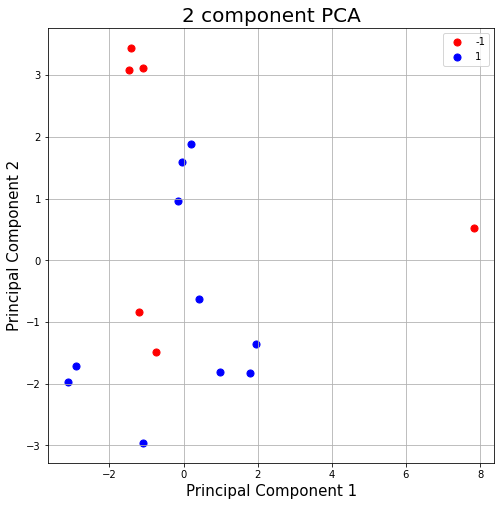

In [61]:
#PCA Plot 2D
plot2D(data_scaled_means, answerIF_hard)

# PCA Plot 3D Isolated Forest

In [62]:
#PCA Plot 3D
plot3D(data_scaled_means, answerIF_hard)

# Local Outlier Factor

In [63]:
lof = LocalOutlierFactor(n_neighbors=2, novelty=True)
lof.fit(data_scaled_means)
answerLOF_hard = lof.predict(data_scaled_means)
answerLOF_hard = pd.DataFrame({'target' : answerLOF_hard})
answerLOF_proba = lof.decision_function(data_scaled_means)
answerLOF_proba = 1 - ((answerLOF_proba - answerLOF_proba.min()) / (answerLOF_proba.max() - answerLOF_proba.min())) 
answerLOF_proba = pd.DataFrame({'target' : answerLOF_proba})
answerLOF_hard.head()

,target
0,1
1,-1
2,1
3,1
4,1


In [64]:
answerLOF_proba.head()

,target
0,0.147291
1,0.465530
2,0.105236
3,0.026991
4,0.025381


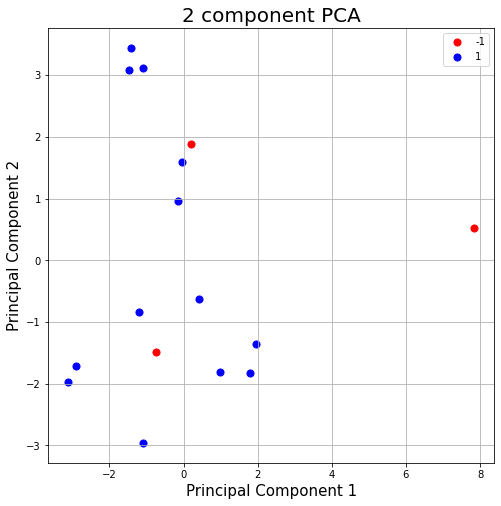

In [31]:
#PCA Plot 2D
plot2D(data_scaled_means, answerLOF_hard)

In [32]:
#PCA Plot 3D
plot3D(data_scaled_means, answerLOF_hard)

In [33]:
ee = EllipticEnvelope()
ee.fit(data_scaled_means)
answerEE_proba = ee.decision_function(data_scaled_means)
answerEE_proba = 1 - (answerEE_proba - 3 * answerEE_proba.min()) * 10 ** 12
answerEE_proba = pd.DataFrame({'target' : answerEE_proba})
answerEE_hard = ee.predict(data_scaled_means)
answerEE_hard = pd.DataFrame({'target' : answerEE_hard})
answerEE_hard.head()

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:644: UserWarning:

The covariance matrix associated to your dataset is not full rank



,target
0,1
1,1
2,1
3,1
4,1


In [34]:
answerEE_proba.head()

,target
0,0.321432
1,0.259259
2,0.245048
3,0.204192
4,0.417355


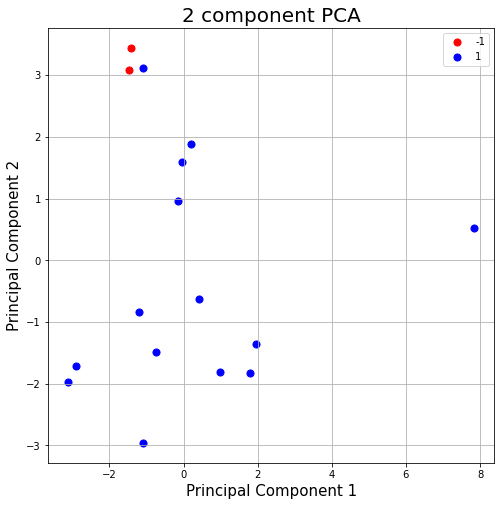

In [35]:
#PCA Plot 2D
plot2D(data_scaled_means, answerEE_hard)

In [36]:
#PCA Plot 3D
plot3D(data_scaled_means, answerEE_hard)

In [37]:
voting_answer =pd.DataFrame({'target' : ((answerIF_proba*2 + answerLOF_proba*1 + answerEE_proba*2) / 5).T.apply(lambda x: -1 if x.values[0]>0.4 else 1 )}) 
voting_answer

,target
0,1
1,-1
2,1
3,1
4,1
5,-1
6,1
7,1
8,1
9,1


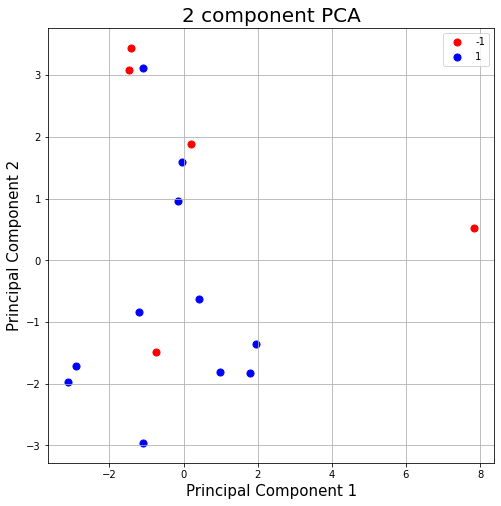

In [38]:
#PCA Plot 2D
plot2D(data_scaled_means, voting_answer)

In [39]:
#PCA Plot 3D
plot3D(data_scaled_means, voting_answer)